In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from math import cos, sin

face3d = np.load('f3d_68_pts.npy')
print(face3d.shape)

(3, 68)


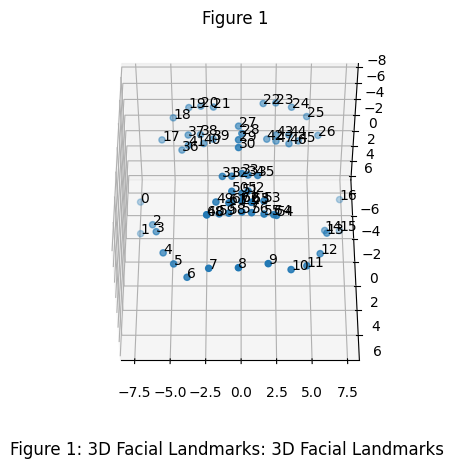

In [124]:
# TODO 1: Draw the 3D facial landmarks.
# enter your code here
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(face3d[0,:], face3d[1,:], face3d[2,:])
ax.view_init(310, 90, 180)
plt.title('Figure 1')


for i in range(len(face3d[0,:])):
    ax.text3D(face3d[0,i],face3d[1,i],face3d[2,i],str(i))
plt.suptitle('Figure 1: 3D Facial Landmarks: 3D Facial Landmarks',y=0,verticalalignment='baseline')
plt.show()

In [63]:
# TODO 2: Computer the Euclidean distance between inner eyes.
# enter your code here
distance = np.sqrt(np.sum((face3d[:,39]-face3d[:,42])**2))
print(distance)


3.8358011


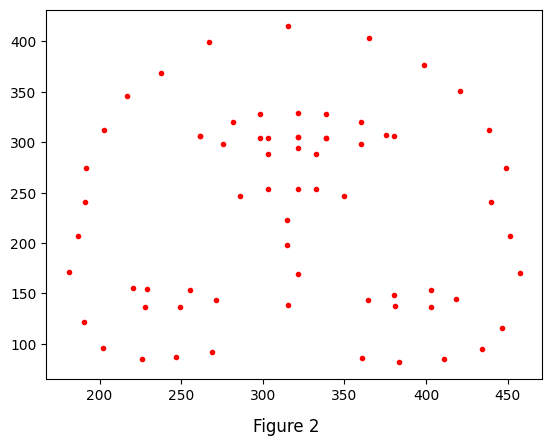

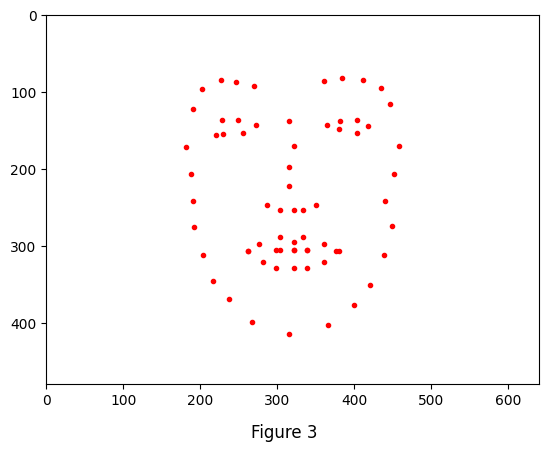

(480, 640, 3)


In [123]:
# TODO 3: 3D-to-2D Projection.
# Step 3.1: Construct the intrinsic matrix K.
# Step 3.2: Contruct the extrinsic matrix [R,t].
# Step 3.3: Construct the 2D projection matrix m.

# Step 3.4: Plot matrix m.

# Step 3.5: Plot matrix m with imshow.
# enter your code here

# Step 3.1
K = np.array([[640, 0, 320],
              [0, 640, 240],
              [0, 0, 1]])

# Step 3.2
R = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1]])
t = np.array([[0],
              [0],
              [30]])
extrinsic_mat = np.hstack((R,t))

# Step 3.3
one = np.ones([1,68])
M_head = np.vstack((face3d, one))

m_head = K@extrinsic_mat@M_head
m = np.vstack((m_head[0:1,:]/m_head[2:3,:],m_head[1:2,:]/m_head[2:3,:]))

# Step 3.4
plt.plot(m[0,:],m[1,:],'r.')
plt.suptitle('Figure 2',y=0,verticalalignment='baseline')
plt.show()

# Step 3.5
plt.plot(m[0,:],m[1,:],'r.')
white_image = np.full((480,640,3),255)
plt.imshow(white_image)
plt.suptitle('Figure 3',y=0,verticalalignment='baseline')
plt.show()

print(white_image.shape)

In [100]:
import math
a = np.array([[2,3,4],
              [1,2,3],
              [1,2,3]])
b = np.array([[2],
              [2],
              [2]])
print(a@b)
one = np.ones([1,68])
M_head = np.vstack((face3d, one))
print(M_head[:,1])

np.cos(math.pi/9)

[[18]
 [12]
 [12]]
[-7.40014982 -1.83640361  5.64191151  1.        ]


0.9396926207859084

In [26]:
# Question 1: Why is the orientation of the face in Figure 2 different from that in Figure 3?
# enter your answer here
# 因為Figure 2 的 y 軸由上到下的值是從大到小，
# 然而Figure 3 的 y 軸只是由上到下的值則是從小到大，
# 導致整體的圖片方向是上下反轉

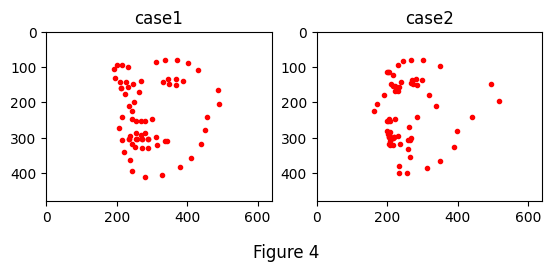

In [58]:

# TODO 4: Repeat Steps 3.1, 3.2, 3.3, 3.5 with different rotation matrices.
# enter your code here
import math
def roatation_matrix(alpha, beta, gamma):
    if alpha == 0:
        alpha_radian = 0
    else:
        alpha_radian = math.pi/(180/alpha)
    
    if beta == 0:
        beta_radian = 0
    else:
        beta_radian = math.pi/(180/beta)
    
    if gamma == 0:
        gamma_radian = 0
    else:
        gamma_radian = math.pi/(180/gamma)
    
    yaw_mat = np.array([[np.cos(alpha_radian), -np.sin(alpha_radian),0],
                        [np.sin(alpha_radian), np.cos(alpha_radian),0],
                        [0, 0, 1]])

    pitch_mat = np.array([[np.cos(beta_radian), 0,np.sin(beta_radian)],
                        [0, 1, 0],
                        [-np.sin(beta_radian), 0, np.cos(beta_radian)]])

    roll_mat = np.array([[ 1, 0, 0],
                        [0, np.cos(gamma_radian), -np.sin(gamma_radian)],
                        [0, np.sin(gamma_radian), np.cos(gamma_radian)]])

    return yaw_mat@pitch_mat@roll_mat

def three_dimesion_2_two_dimesion(K, extrinsic_mat, face3d):
    one = np.ones([1,len(face3d[0,:])])
    M_head = np.vstack((face3d, one))
    m_head = K@extrinsic_mat@M_head
    m = np.vstack((m_head[0:1,:]/m_head[2:3,:],m_head[1:2,:]/m_head[2:3,:]))
    return m

def plot_2d_matrix(m,height=480,width=640):
    plt.plot(m[0,:],m[1,:],'r.')
    white_image = np.full((height,width,3),255)
    plt.imshow(white_image)

K = np.array([[640, 0, 320],
              [0, 640, 240],
              [0, 0, 1]])

t = np.array([[0],
              [0],
              [30]])

R_1 = roatation_matrix(0,20,0)
extrinsic_mat_1 = np.hstack((R_1,t))
m_1 = three_dimesion_2_two_dimesion(K,extrinsic_mat_1,face3d)


R_2 = roatation_matrix(0,60,0)
extrinsic_mat_2 = np.hstack((R_2,t))
m_2 = three_dimesion_2_two_dimesion(K,extrinsic_mat_2,face3d)

fig4 = plt.figure()

plt.subplot(1,2,1)
plot_2d_matrix(m_1)
plt.title('case1')
plt.subplot(1,2,2)
plot_2d_matrix(m_2)
plt.title('case2')

plt.suptitle('Figure 4',y=0.2,verticalalignment='baseline')

plt.show()
    

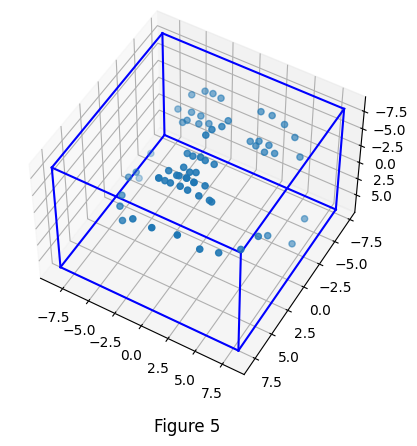

Text(0.5, 0, 'Figure 7')

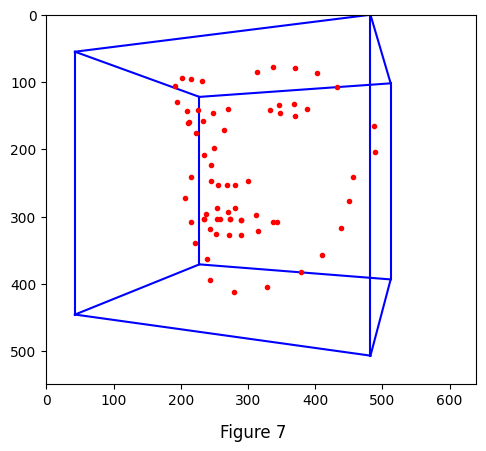

In [67]:
# TODO 5: Augmented Reality
# Step 5.1: Construct the eight vertices of the cube containing the 3D facial landmarks
# Step 5.2: Follow TODO 4 to project the 3D facial landmarks and the eight vertices of the cube onto the 2D space.
# enter your code here

x_max_min = [np.min(face3d[0,:])-1, np.max(face3d[0,:])+1]
y_max_min = [np.min(face3d[1,:])-1, np.max(face3d[1,:])+1]
z_max_min = [np.min(face3d[2,:])-1, np.max(face3d[2,:])+1]

def cube_point(x_max_min,y_max_min,z_max_min):
    max_min = [x_max_min,y_max_min,z_max_min]
    vertices = []
    for x in x_max_min:
        for y in y_max_min:
            for z in z_max_min:
                vertices.append([x, y, z])

    return vertices

cube_vertices =np.array(cube_point(x_max_min,y_max_min,z_max_min)) 
cube_vertices = cube_vertices.T
vertices =cube_point(x_max_min,y_max_min,z_max_min) 

fig5 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(face3d[0,:], face3d[1,:], face3d[2,:])

connect_point = {0:[1,2,4],3:[1,2,7],5:[1,4,7],6:[2,4,7]}

ax.view_init(310, 60, 180)

for index, index_num in enumerate(connect_point):
    for i in connect_point[index_num]:
        ax.plot(cube_vertices[0,[index_num,i]],cube_vertices[1,[index_num,i]], cube_vertices[2,[index_num,i]],'b')

plt.suptitle('Figure 5',y=0,verticalalignment='baseline')
plt.show()

# Step 5.2

face3d_with_cube = np.hstack((face3d, cube_vertices))

R_1 = roatation_matrix(0,20,0)
extrinsic_mat_1 = np.hstack((R_1,t))
m_1 = three_dimesion_2_two_dimesion(K,extrinsic_mat_1,face3d_with_cube)

fig7 = plt.figure()

cube_vertice_2d = m_1[:,68:]
for index, index_num in enumerate(connect_point):
    for i in connect_point[index_num]:
        plt.plot(cube_vertice_2d[0,[index_num,i]],cube_vertice_2d[1,[index_num,i]],'b')

plot_2d_matrix(m_1[:,0:68],height=550)
plt.suptitle('Figure 7',y=0,verticalalignment='baseline')
